# Importing Dataset

In [11]:
import os, shutil

In [9]:
base_dir = 'C:\\Users\\Jastor\\Desktop\\MY ML\\Practise\\Deep Learning\\Convulutional Neural Network Layers\\cats_and_dog_small'
original_dataset_dir = 'F:\\kaggle_dataset\\train'

In [6]:
os.mkdir(base_dir)

In [12]:
# making superfolders for training, validation and testing data
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [10]:
# making specific folders for cats and dogs images in superfolders
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

valid_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(valid_cats_dir)

valid_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(valid_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [18]:
orig_cats_dir = os.path.join(original_dataset_dir, 'cats')
orig_dogs_dir = os.path.join(original_dataset_dir, 'dogs')

fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(orig_cats_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orig_cats_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(orig_cats_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(orig_dogs_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orig_dogs_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(orig_dogs_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Its time to create Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plaidml.keras
plaidml.keras.install_backend()

from keras import models, layers

In [23]:
network = models.Sequential() 
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(64, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(128, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(128, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu')) 
network.add(layers.Dense(1, activation='sigmoid'))

In [55]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [59]:
from keras import optimizers

network.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

# Image Preprocessing

Before feeding Neural Network with training data, we have to preprocess it.
There are 4 steps to make appropriate training and testing data that can be fed to Neural Network

**1. Read the picture files**

**2. Decode JPEG content to RGB grid of pixels**

**3. Convert these into floating-point tensors**

**4. Rescale the pixels values (between 0 to 255) to in range [0, 1]**

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
for data_batch, labels_batch in train_generator:
    print("data_batch_shape: {}".format(data_batch.shape))
    print("labels_batch_shape: {}".format(labels_batch.shape))
    print("unique labels: {}".format(len(set(labels_batch))))
    break

data_batch_shape: (20, 150, 150, 3)
labels_batch_shape: (20,)
unique labels: 2


# Fitting data into the model

In [60]:
history = network.fit_generator(train_generator, steps_per_epoch=100, epochs = 20, validation_data = validation_generator, validation_steps=50)

Epoch 1/20


INFO:plaidml:Analyzing Ops: 69 of 290 operations complete


100/100 [==============================] - 41s 406ms/step - loss: 0.6962 - acc: 0.5005 - val_loss: 0.6919 - val_acc: 0.5210
Epoch 2/20
100/100 [==============================] - 31s 311ms/step - loss: 0.6842 - acc: 0.5490 - val_loss: 0.6474 - val_acc: 0.6380
Epoch 3/20
100/100 [==============================] - 31s 311ms/step - loss: 0.6637 - acc: 0.6060 - val_loss: 0.6437 - val_acc: 0.6090
Epoch 4/20
100/100 [==============================] - 31s 310ms/step - loss: 0.6421 - acc: 0.6345 - val_loss: 0.6282 - val_acc: 0.6460
Epoch 5/20
100/100 [==============================] - 31s 309ms/step - loss: 0.6075 - acc: 0.6750 - val_loss: 0.6050 - val_acc: 0.6590
Epoch 6/20
100/100 [==============================] - 31s 313ms/step - loss: 0.5526 - acc: 0.7115 - val_loss: 0.6091 - val_acc: 0.6780
Epoch 7/20
100/100 [==============================] - 32s 315ms/step - loss: 0.4799 - acc: 0.7555 - val_loss: 0.6329 - val_acc: 0.6800
Epoch 8/20
100/100 [==============================] - 31s 314ms/st

In [19]:
def show_loss(hist, epochs = 5):
    loss = hist['loss']
    val_loss = hist['val_loss']
    epoch = range(1, epochs+1)
    plt.plot(epoch, loss, 'bo', label = "Training Loss")
    plt.plot(epoch, val_loss, 'b', label = "Validation Loss")
    plt.show()
    
def show_accuracy(hist, epochs = 5):
    acc = hist['acc']
    val_acc = hist['val_acc']
    epoch = range(1, epochs+1)
    plt.plot(epoch, acc, 'bo', label = "Training Accuracy")
    plt.plot(epoch, val_acc, 'b', label = "Validation Accuracy")
    plt.show()

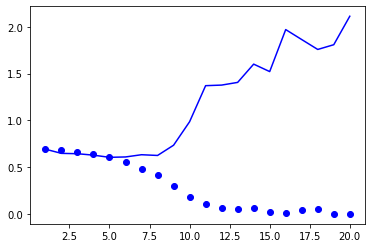

In [62]:
show_loss(history.history, epochs = 20)

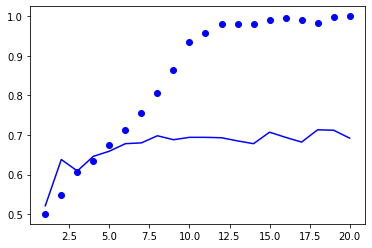

In [63]:
show_accuracy(history.history, epochs = 20)

# Now we use Data Augmentation

Data Augmentation consist of operations such as zooming, shearing images, flipping them, but keep them what I called *classifiable* for classification and making somewhat new images, which let the neural network learn every aspects of the dataset.

In [3]:
network = models.Sequential() 
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(64, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(128, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Conv2D(128, (3, 3), activation='relu')) 
network.add(layers.MaxPooling2D((2, 2))) 
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu')) 
network.add(layers.Dense(1, activation='sigmoid'))

INFO:plaidml:Opening device "opencl_amd_iceland.0"


In [4]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
train_set = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode='binary')
validation_set = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history_1 = network.fit_generator(train_set, steps_per_epoch=len(train_set), epochs = 40, validation_data=validation_set, validation_steps=len(validation_set))

Epoch 1/40


INFO:plaidml:Analyzing Ops: 134 of 255 operations complete


 1/63 [..............................] - ETA: 7:49 - loss: 0.6946 - acc: 0.5000

INFO:plaidml:Analyzing Ops: 84 of 255 operations complete


63/63 [==============================] - 44s 704ms/step - loss: 0.6953 - acc: 0.4945 - val_loss: 0.6864 - val_acc: 0.5110
Epoch 2/40
63/63 [==============================] - 27s 425ms/step - loss: 0.6881 - acc: 0.5451 - val_loss: 0.6758 - val_acc: 0.5400
Epoch 3/40
63/63 [==============================] - 28s 439ms/step - loss: 0.6756 - acc: 0.5754 - val_loss: 0.6826 - val_acc: 0.5550
Epoch 4/40
63/63 [==============================] - 28s 441ms/step - loss: 0.6670 - acc: 0.5992 - val_loss: 0.6694 - val_acc: 0.5690
Epoch 5/40
63/63 [==============================] - 28s 442ms/step - loss: 0.6557 - acc: 0.6126 - val_loss: 0.6428 - val_acc: 0.6190
Epoch 6/40
63/63 [==============================] - 28s 441ms/step - loss: 0.6521 - acc: 0.6032 - val_loss: 0.6756 - val_acc: 0.5760
Epoch 7/40
63/63 [==============================] - 28s 442ms/step - loss: 0.6442 - acc: 0.6275 - val_loss: 0.6123 - val_acc: 0.6560
Epoch 8/40
63/63 [==============================] - 28s 443ms/step - loss: 0.630

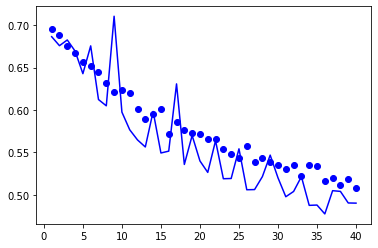

In [20]:
show_loss(history_1.history, epochs = 40)

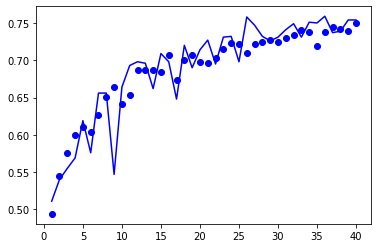

In [22]:
show_accuracy(history_1.history, epochs = 40)

# Model 2

In [24]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation = "relu"))
network.add(layers.Dense(1, activation = "sigmoid"))

In [25]:
network.compile(optimizer = optimizers.RMSprop(lr=1e-3), loss="binary_crossentropy", metrics=['accuracy'])

In [27]:
history_1 = network.fit_generator(train_set, steps_per_epoch=len(train_set), epochs = 50, validation_data = validation_set, validation_steps = len(validation_set))

Epoch 1/50


INFO:plaidml:Analyzing Ops: 73 of 223 operations complete


 1/63 [..............................] - ETA: 15:08 - loss: 0.7120 - acc: 0.4375

INFO:plaidml:Analyzing Ops: 73 of 223 operations complete


63/63 [==============================] - 65s 1s/step - loss: 1.4912 - acc: 0.5084 - val_loss: 0.6922 - val_acc: 0.5580
Epoch 2/50
63/63 [==============================] - 29s 458ms/step - loss: 0.7038 - acc: 0.5238 - val_loss: 0.6818 - val_acc: 0.5490
Epoch 3/50
63/63 [==============================] - 30s 478ms/step - loss: 0.7002 - acc: 0.5679 - val_loss: 0.6686 - val_acc: 0.5900
Epoch 4/50
63/63 [==============================] - 30s 479ms/step - loss: 0.6700 - acc: 0.6002 - val_loss: 0.6307 - val_acc: 0.6320
Epoch 5/50
63/63 [==============================] - 30s 476ms/step - loss: 0.6752 - acc: 0.6116 - val_loss: 0.6238 - val_acc: 0.6380
Epoch 6/50
63/63 [==============================] - 30s 477ms/step - loss: 0.6580 - acc: 0.6468 - val_loss: 0.6216 - val_acc: 0.6430
Epoch 7/50
63/63 [==============================] - 30s 475ms/step - loss: 0.6378 - acc: 0.6295 - val_loss: 0.6119 - val_acc: 0.6400
Epoch 8/50
63/63 [==============================] - 30s 477ms/step - loss: 0.6338 -

In [28]:
network.save('model.h5')

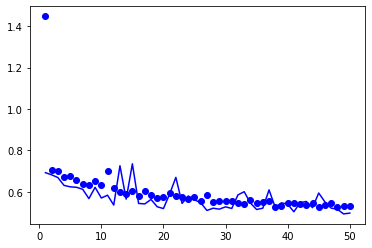

In [30]:
show_loss(history_1.history, epochs = 50)

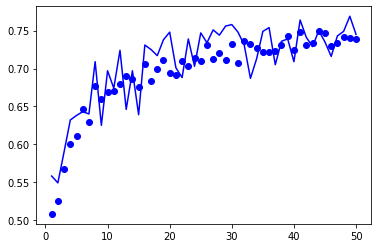

In [32]:
show_accuracy(history_1.history, epochs = 50)